# Data Storytelling: The Bechdel Test

### *Has the representation of women in film improved over time? Does this vary across different genres, and which perform the best and worst?*

---

1. [What is the Bechdel Test?](#1-what-is-the-bechdel-test) 

2. [Importing and Preparing the Data](#2--importing-and-preparing-the-data)

3. [Trends in the Data](#3-trends-in-the-data)
   - [Representation Over Time](#representation-over-time)
   - [Genres](#genres)
   - [IMDB Movie Rating](#imdb-movie-rating)

4. [Conclusions](#4-conclusions)

--- 

Data Source: [Kaggle Dataset - 9000+ Movies : IMDb and Bechdel](https://www.kaggle.com/datasets/nliabzd/movies-imdb-and-bechdel-information/data)

## 1. What is the Bechdel Test?

The Bechdel Test was first introduced in 1985 as a joke in a comic by Allison Bechdel. Since its inception, the Bechdel Test has become a widely used measure of the representation of women in film. A movie passes the test if it satisfies the following requirements:
1. the movie has to have at least two women in it,
2. who talk to each other,
3. about something other than a man.


In the following analysis, a movie passes the Bechdel Test if it satisfies all three of these requirements. 

## 2.  Importing and Preparing the Data

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# set the style of the plots
sns.set_theme(style="ticks", palette="Set2")
sns.despine()

<Figure size 640x480 with 0 Axes>

In [2]:
file = './data/Bechdel_IMDB_Merge0524.csv'

# import the data as DataFrame
df_full = pd.read_csv(file)

# filter for movies after 1965
df = df_full[df_full['year'] >= 1965].copy()
df.replace('\\N', np.nan, inplace=True)

df.tail()

,title,year,imdbid,id,bechdelRating,imdbAverageRating,numVotes,runtimeMinutes,genre1,genre2,genre3
9713,Lisa Frankenstein,2024,21188080.0,11276,2,6.1,16176.0,101,Comedy,Horror,Romance
9714,Love Lies Bleeding,2024,19637052.0,11294,3,6.7,23333.0,104,Action,Adventure,Crime
9715,Mean Girls,2024,11762114.0,11271,3,5.7,28257.0,112,Comedy,Musical,NaN
9716,Megamind vs. The Doom Syndicate,2024,31122323.0,11280,3,2.4,4076.0,83,Action,Adventure,Animation
9717,Road House,2024,3359350.0,11303,3,6.2,125714.0,121,Action,Thriller,NaN


In [3]:
print(f'Full data set: {df_full.shape}')
print('\nFiltered data set summary:')
df.info()

Full data set: (9718, 11)

Filtered data set summary:
<class 'pandas.core.frame.DataFrame'>
Index: 8631 entries, 1087 to 9717
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              8631 non-null   object 
 1   year               8631 non-null   int64  
 2   imdbid             8631 non-null   float64
 3   id                 8631 non-null   int64  
 4   bechdelRating      8631 non-null   int64  
 5   imdbAverageRating  8631 non-null   float64
 6   numVotes           8631 non-null   float64
 7   runtimeMinutes     8623 non-null   object 
 8   genre1             8629 non-null   object 
 9   genre2             7507 non-null   object 
 10  genre3             5212 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 809.2+ KB


In [4]:
df[['year', 'bechdelRating', 'imdbAverageRating', 'numVotes']].describe().T.style.format('{:.2f}')

,count,mean,std,min,25%,50%,75%,max
year,8631.00,2004.13,13.93,1965.00,1997.00,2008.00,2014.00,2024.00
bechdelRating,8631.00,2.19,1.06,0.00,1.00,3.00,3.00,3.00
imdbAverageRating,8631.00,6.50,0.99,1.20,6.00,6.60,7.20,9.30
numVotes,8631.00,96744.36,191155.15,9.00,6055.50,28827.00,102225.00,2899202.00


In [5]:
# add pass metric
df_full['pass'] = df_full['bechdelRating'].apply(lambda x: 1 if x ==3 else 0)
df['pass'] = df['bechdelRating'].apply(lambda x: 1 if x ==3 else 0)

# Genre Analysis
# measure scores by genre; Combine genre columns into a single column
df['genres'] = df[['genre1', 'genre2', 'genre3']].apply(lambda x: ','.join(x.dropna()), axis=1)
df['genres'] = df['genres'].str.split(',')

# Grouping by year
count_by_year = df[df['year'] >= 1965].groupby('year')[['bechdelRating','imdbAverageRating']].value_counts(normalize=True).unstack().fillna(0)

df['decade'] = df['year'] // 10 * 10
decade_avg = df.groupby('decade')[['bechdelRating', 'imdbAverageRating']].mean().reset_index()

# film periods
film_pd = pd.DataFrame({'era': ['Silent Era', 'Golden Age', 'Post-War', 'New Hollywood', 'Blockbuster Age'],
           'start': [1895, 1927, 1948, 1965, 1975],
           'end': [1927, 1948, 1965, 1983, 2024]})

pass_labels = {0: 'Fail', 1: 'Pass'}
df['pass_label'] = df['pass'].map(pass_labels)

## 3. Trends in the Data

### Representation Over Time


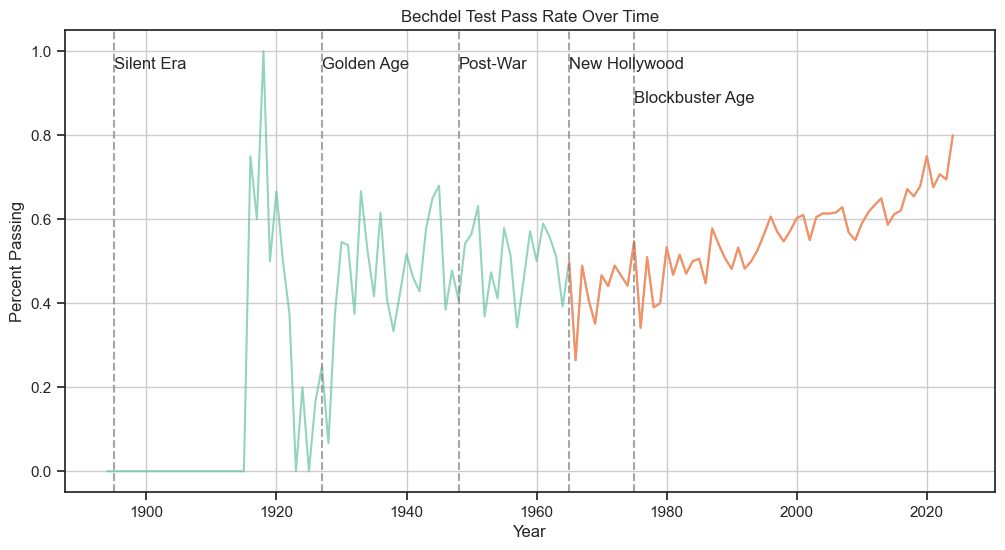

In [6]:
# Bechdel Test Pass Rate Over Time
pass_rate = df.groupby('year')['pass'].mean().reset_index()

# Plot Bechdel Test Pass Rate Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_full.groupby('year')['pass'].mean().reset_index(), x='year', y='pass', alpha=0.7)
sns.lineplot(data=pass_rate, x='year', y='pass', alpha=1)
plt.title('Bechdel Test Pass Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Percent Passing')
plt.grid(True)

# Annotate with film_pd start
for _, row in film_pd.iterrows():
    plt.axvline(x=row['start'], linestyle='--', alpha=0.7, color='gray')
    if row['era'] == 'Blockbuster Age':
        i = 0.08
    else:
        i = 0
    plt.text(row['start'], 0.95-i, row['era'], verticalalignment='bottom')
    
plt.show()

**Important Periods in Cinematic History**
- 1911-1927: Silent Era
- 1927-1948: Sound & Golden Age of Hollywood
- 1948-1965: Post-War, Fall of the Studio System
- 1965-1983: New Hollywood (American New Wave)
- 1975-present: Blockbuster Age

Early silent films were all experimental by nature, and there is volatility in how frequently films passed the Bechdel Test. The Hollywood studio system dominated from the late-1920's through mid-1960's, during which we can see a relative plateau between 40-60% of films passing the test. 

The New Hollywood and Blockbuster Age (orange portion of the line) includes the beginnings of film entertainment as we know it today, and how it develops into the content we currently consume. We can already see a continual upward trend during this period, indicating a growing portion of films are expanding female representation. The regression graph below focuses on this time (1965-present) and reinforces this positive trend. 

**The remainder of this analysis will only look at films produced in the New Hollywood and Blockbuster Eras (1965-present).**

<Figure size 1200x600 with 0 Axes>

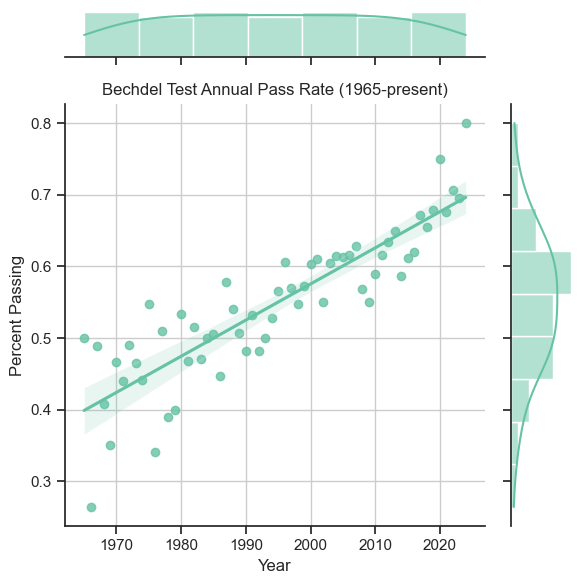

In [7]:
# Plot Bechdel Test Pass Rate Over Time
plt.figure(figsize=(12, 6))
sns.jointplot(data=pass_rate, x='year', y='pass', kind='reg')
plt.title('Bechdel Test Annual Pass Rate (1965-present)')
plt.xlabel('Year')
plt.ylabel('Percent Passing')
plt.tight_layout()
plt.grid(True)

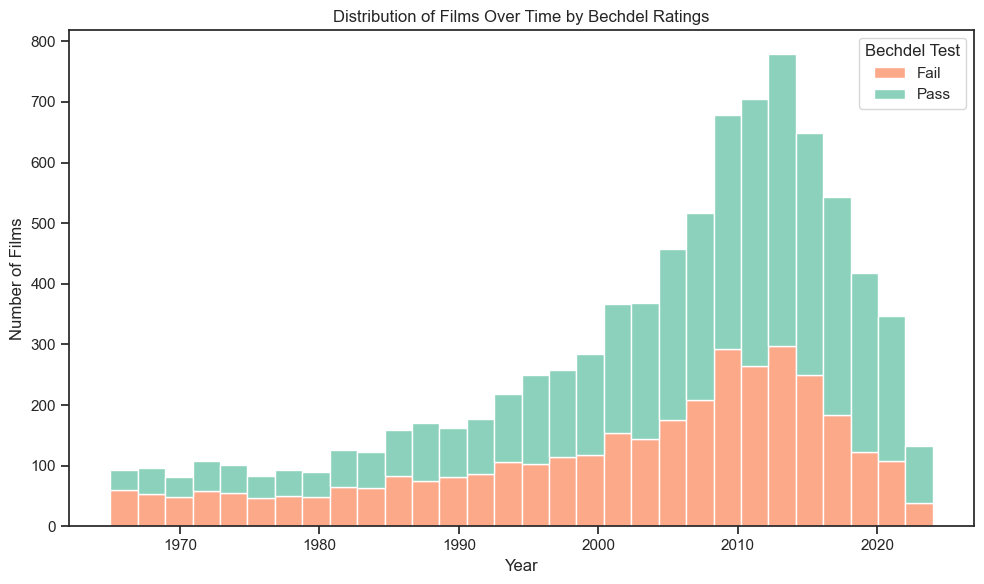

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='year', hue='pass_label', multiple='stack', bins=30)
plt.title('Distribution of Films Over Time by Bechdel Ratings')
plt.xlabel('Year')
plt.ylabel('Number of Films')
plt.legend(title='Bechdel Test', labels=['Fail', 'Pass'])
plt.tight_layout()
plt.show()

The histogram shows the increase in films being produced in recent decades, in comparison to the 1960-80's.

### Genres

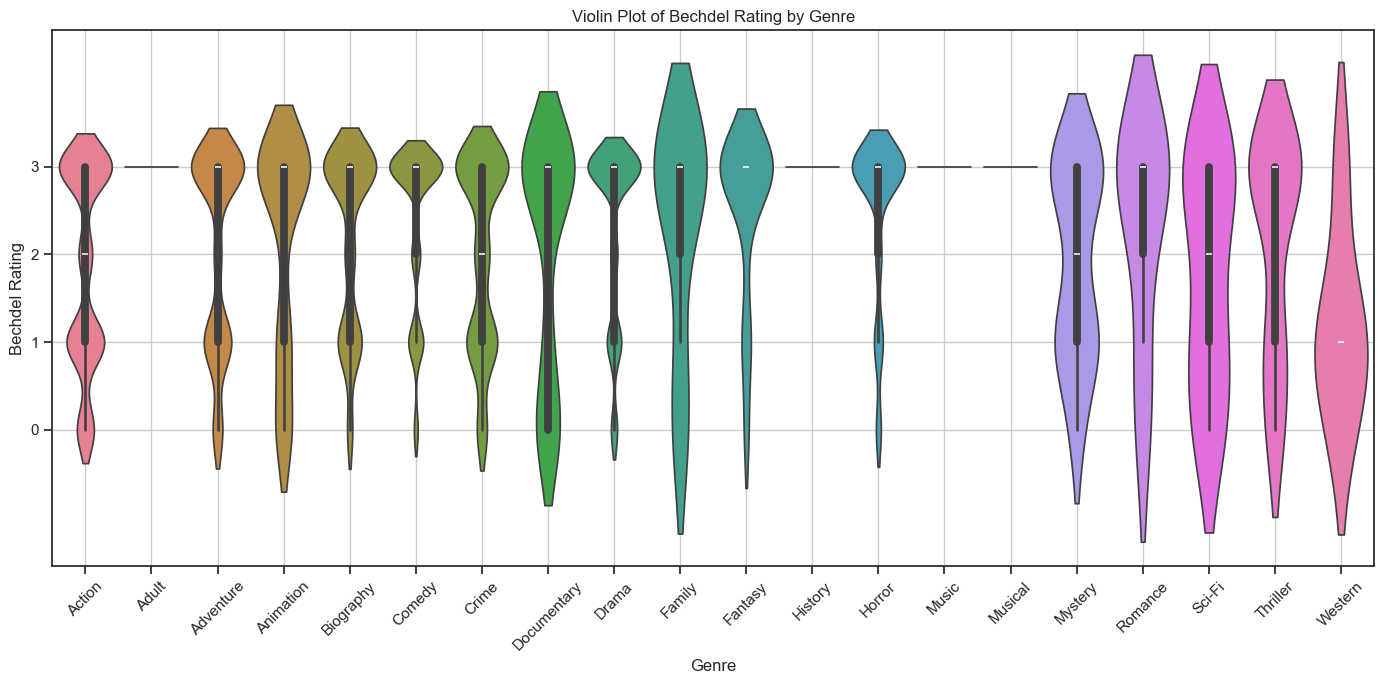

In [9]:
plt.figure(figsize=(14, 7))
sns.violinplot(data=df.sort_values('genre1'), x='genre1', y='bechdelRating', hue='genre1', cut=1.5)
plt.title('Violin Plot of Bechdel Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Bechdel Rating')
plt.xticks(rotation=45)
plt.yticks(ticks=[0,1,2,3])
plt.grid(True)
plt.legend().remove()
plt.tight_layout()
plt.show()

These violin plots are a quick overview of the distribution of Bechdel scores across each genre. We can see Animation, Family, and Romance are relatively top-heavy (i.e. more 3's) compared to Westerns, which is notably bottom-heavy. Genres for Adult, History, Music, and Musicals do not have sufficient data points to draw a full violin shape. I will continue investigating only the top 10 genres to ensure there are enough observations to make meaningful insights. 

In [10]:
# explode genres column to have one genre per row
genres_exploded = df.copy().explode('genres')
top_genres = genres_exploded['genres'].value_counts().head(10).index
top_5_genres = genres_exploded['genres'].value_counts().head(5).index
movies_exploded_top = genres_exploded[genres_exploded['genres'].isin(top_genres)]

# Calculate average pass rate by genre
average_pass_by_genre = movies_exploded_top.groupby('genres')['pass'].mean().reset_index()


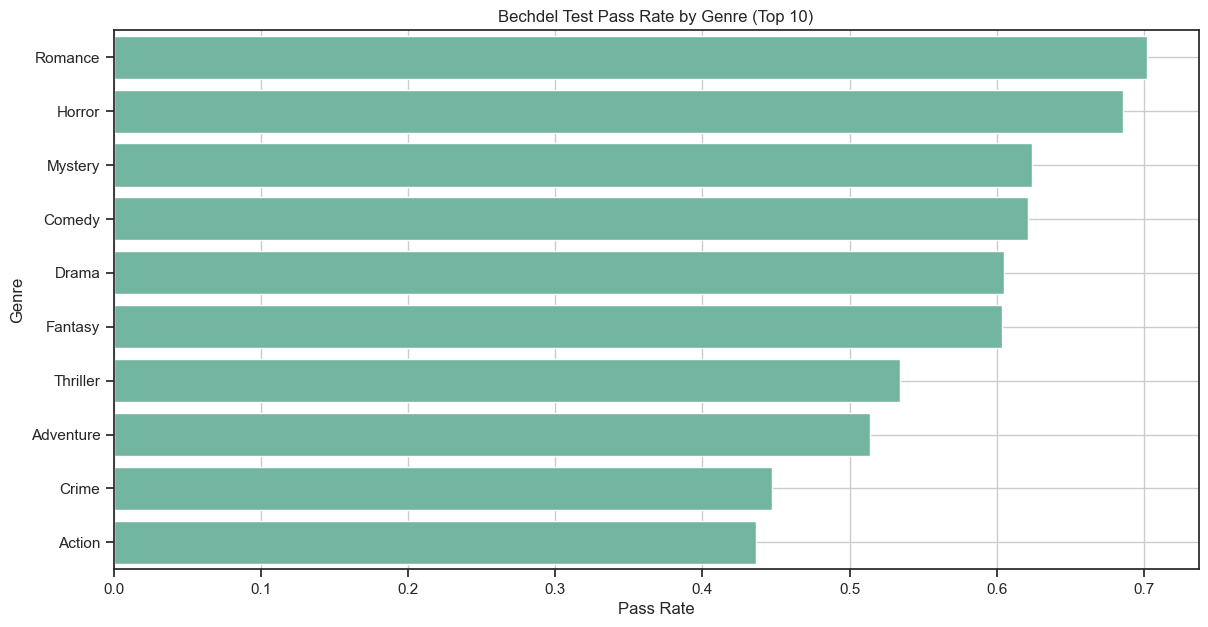

In [11]:
# Plot Genre Analysis
plt.figure(figsize=(14, 7))
sns.barplot(data=average_pass_by_genre, x='pass', y='genres', order=average_pass_by_genre.sort_values('pass', ascending=False)['genres'])
plt.title('Bechdel Test Pass Rate by Genre (Top 10)')
plt.xlabel('Pass Rate')
plt.ylabel('Genre')
plt.grid(True)
plt.show()

**Romance** as the best female representation overall is not too surprising; it is a genre that traditionally caters to female audiences, and therefore it makes sense that it would have diverse and more realistic depictions of women. 

**Horror's** second place rank is initially surprising to me. However, I can think of a number of classic horror movies that are centered around its female characters: Carrie, Silence of the Lambs, Rosmery’s Baby, The Exorcist, etc. I will explore this phenomenon in the following figure.

On the other end of the rankings, less than half of **Action** and **Crime** films have passed the Bechdel test. These genres are deeply based in gender biases that favor men through traditional masculinity and gender roles. It would make sense that these films are less likely to adapt to more modern depictions of women on screen, as there are just fewer female characters to begin with.

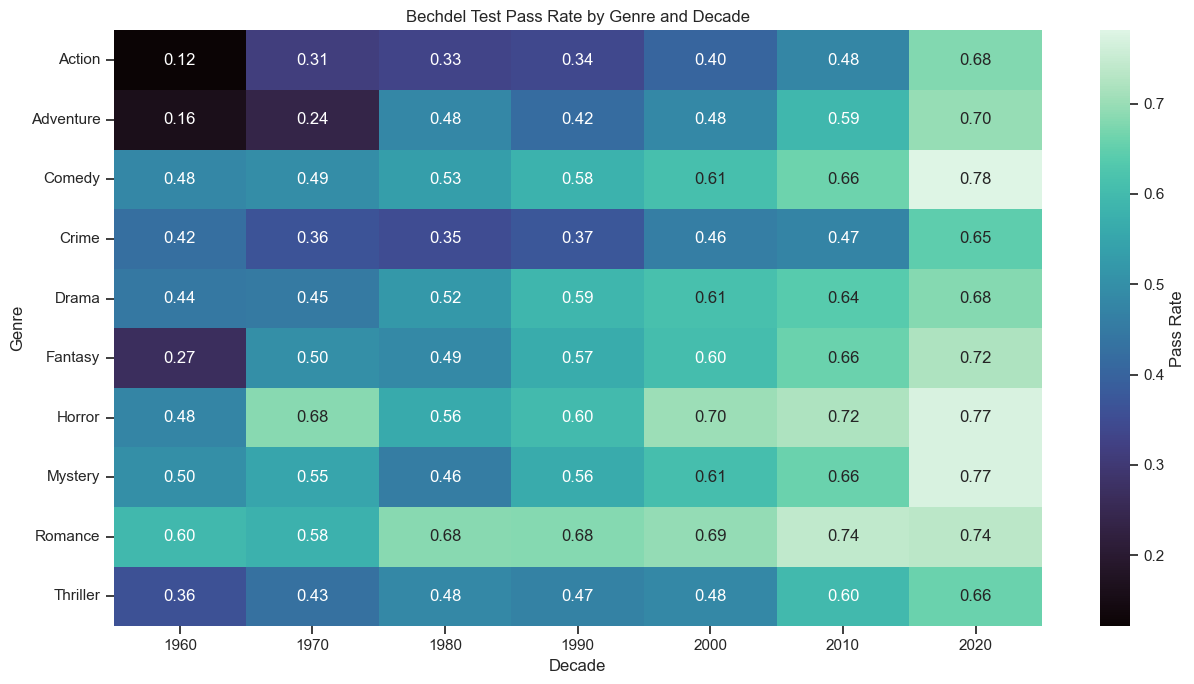

In [12]:
# Group by decade and calculate pass rate
genre_by_decade = movies_exploded_top.copy()
genre_by_decade['decade'] = (genre_by_decade['year'] // 10) * 10
genre_pass_rate_by_decade = genre_by_decade.groupby(['decade', 'genres'])['pass'].mean().reset_index()

# Pivot the data for heatmap
genre_pass_rate_pivot = genre_pass_rate_by_decade.pivot(index='genres', columns='decade', values='pass')

# Plot the heatmap
plt.figure(figsize=(13, 7))
sns.heatmap(genre_pass_rate_pivot, annot=True, fmt=".2f", cmap='mako', cbar_kws={'label': 'Pass Rate'})
plt.title('Bechdel Test Pass Rate by Genre and Decade')
plt.xlabel('Decade')
plt.ylabel('Genre')
plt.tight_layout()
plt.grid(False)
plt.show()

Here we can see how the top 10 genres perform over time, in each decade. Some notable trends are: 
- all of these genres are passing the Bechdel Test more frequently now than in the 1960's and 1970's
- **Romance** consistently has the highest or one of the highest pass rates in each decade
- conversely, **Action** and **Crime** are consistently some of the lowest in each decade
- **Horror** in the 1970's had a large proportion of passing movies compared to other genres at the time, including Romance
- the 2020's as a whole see a large increase in proportion of passing movies, which may be a factor of a drastically changing film/production landscape due to COVID-19

When it comes to Horror as a genre and its surprisingly high score, there are multiple factors at play. The table below lists all Horror movies form the 70's from the dataset. There are a number of popular and well-known movies that have central female characters: The Exorcist, Carrie, Suspiria, Halloween, and Alien, as examples. However, a shortcoming of the Bechdel Test is that it does not measure the *quality* of how women are depicted. Characters in horror movies are frequently victims of horrible deaths or fates, regardless of gender. So while there are proportionally more complex female characters within this genre, there is no guarantee that these representations are favorable. 

In [13]:
# Filter for titles in the 1970s with the Horror genre
horror_70s = df[(df['year'] >= 1970) & (df['year'] < 1980) & (df['genres'].apply(lambda x: 'Horror' in x))]

# Display the titles
horror_70s[horror_70s['imdbAverageRating']>7][['title', 'year', 'bechdelRating']]

,title,year,bechdelRating
1483,Don&#39;t look now,1973,3
1486,"Exorcist, The",1973,3
1522,"Wicker Man, The",1973,3
1529,Black Christmas,1974,3
1559,"Texas Chain Saw Massacre, The",1974,1
1573,Deep Red,1975,3
1598,"Rocky Horror Picture Show, The",1975,3
1616,Carrie,1976,3
1635,"Omen, The",1976,3
1667,Eraserhead,1977,0


### IMDB Movie Rating

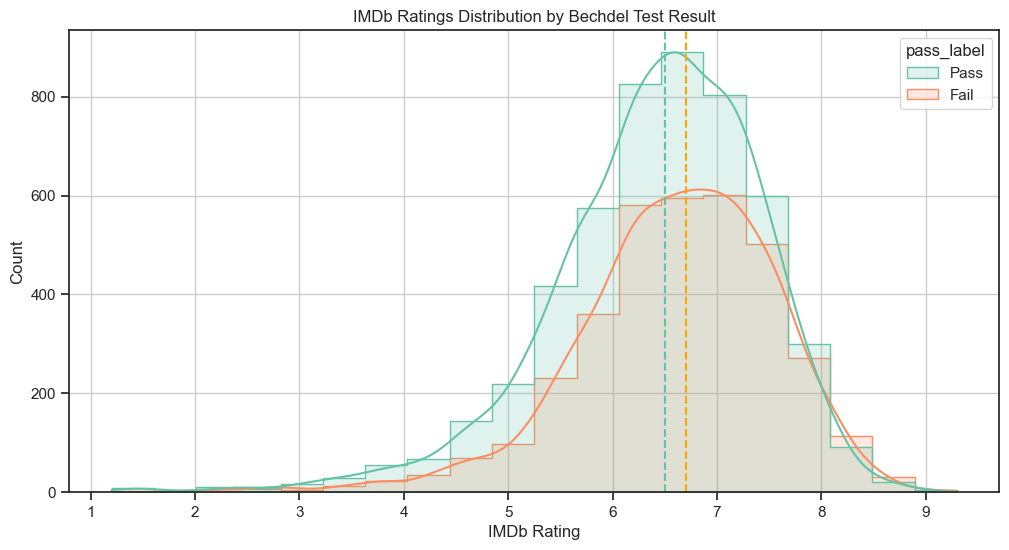

In [14]:
# Calculate the average IMDb rating by decade
average_rating_by_decade = df.groupby('decade')['imdbAverageRating'].mean().reset_index()

# Plot the average IMDb rating by decade

# IMDb Ratings Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='imdbAverageRating', hue='pass_label', kde=True, element='step', bins=20, alpha=0.2)
plt.axvline(df[df['pass']==1]['imdbAverageRating'].median(), linestyle='--', label='Passing Films Median')
plt.axvline(df[df['pass']==0]['imdbAverageRating'].median(), color='orange', linestyle='--', label='Failing Films Median')
plt.title('IMDb Ratings Distribution by Bechdel Test Result')
plt.xlabel('IMDb Rating')
plt.ylabel('Count')
plt.grid(True)
plt.show()

While there are more films massing the Bechdel Test at most rating levels, the median IMDB rating for films failing the Bechdel Test is slightly higher. Notably at higher ratings above 8.0, there are actually more films failing the test than passing. I am interested in if and how highly rated films differ in the patterns we saw across all movies in the previous section.

#### Ratings in the 90th Percentile 

In [15]:
# Calculate the 90th percentile value for imdbAverageRating
percentile_90 = df['imdbAverageRating'].quantile(0.90)

print(f'90th Percentile of IMDB Ratings: {percentile_90}')

90th Percentile of IMDB Ratings: 7.6


The following graphs  look at films in the 90th percentile of IMDB ratings (>= 7.6) and only of select genres that have been previously highlighted. 

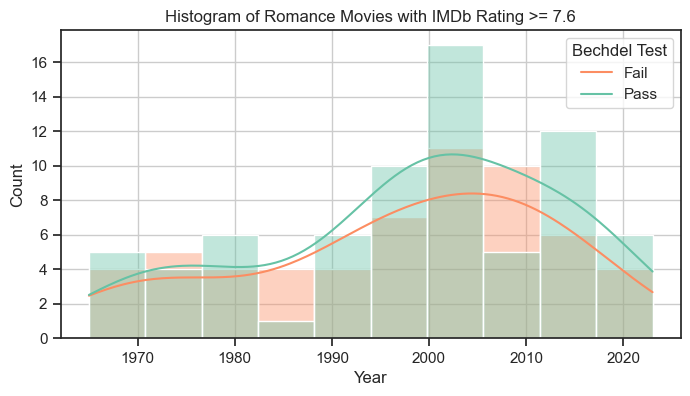

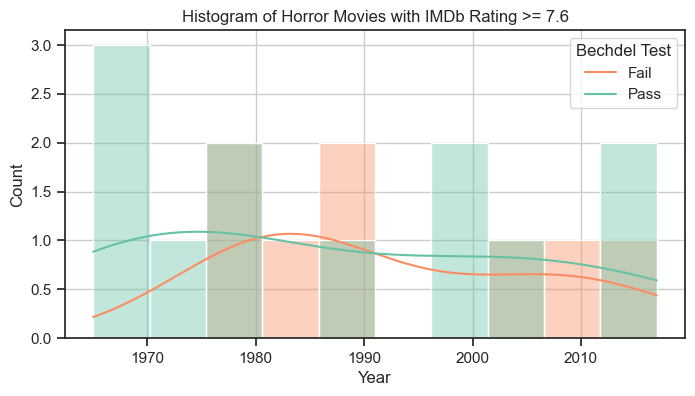

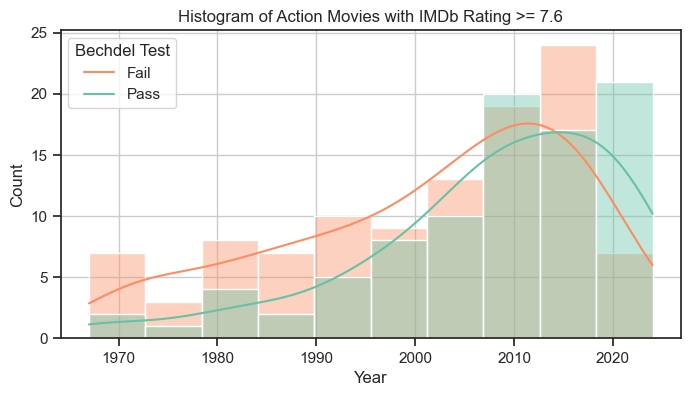

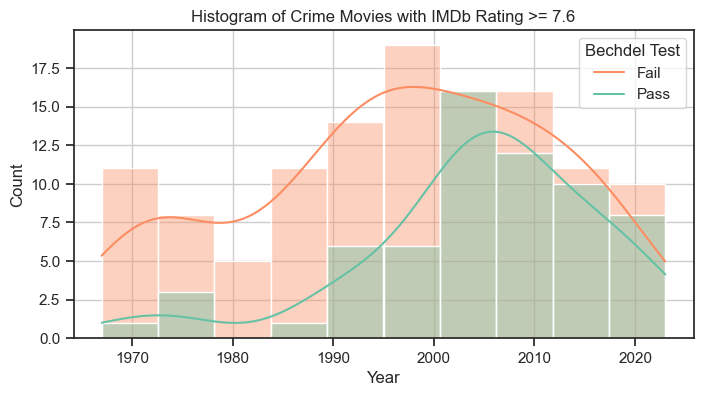

In [16]:
# Filter movies for top 90th percentile IMDb ratings
high_rated_movies = movies_exploded_top[movies_exploded_top['imdbAverageRating'] >= percentile_90]

# Plot the scatter plot
for genre in ['Romance', 'Horror', 'Action', 'Crime']:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=high_rated_movies[high_rated_movies['genres'] == genre], x='year', hue='pass_label', kde=True, bins=10, alpha=0.4)
    plt.title(f'Histogram of {genre} Movies with IMDb Rating >= {percentile_90}')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.legend(title='Bechdel Test', labels=['Fail', 'Pass'])
    plt.grid(True)
    plt.show()


*The following observations are based on the smoother kernel density estimation (KDE) lines rather than the rigid histogram bins to extract overall trends.*

**Romance:** While relatively close overtime, highly rated romance films consistently pass the Bechdel Test more frequently than fail. 

**Horror:** There a much more inconsistency compared to the other genres, and harder to make definitive conclusions about the highly rated horror films. 

**Action:** There is a long history of fewer action movies passing the test, but recently passing movies have surpassed those that fail.

**Crime:** Despite the gap closing since the mid-2000's, crime movies consistently fail the Bechdel Test more frequently than pass year after year.  

## 4. Conclusions

*Has the representation of women in film improved over time? Does this vary across different genres, and which perform the best and worst?*

To address my original questions:
1.	Yes, there is an overall positive trend of movies passing the Bechdel test more frequently today compared to the 1960’s and 70’s, which indicates better efforts to authentically represent women characters. 
2.	While the top 10 most common genres have improved in this way, the proportion of films that pass the test vary greatly by genre. The genres that most frequently pass the Bechdel Test are Romance and, surprisingly, Horror, and the least frequent pass rates are associated with Action and Crime movies. 
 
Interestingly, the highest rated films in the top 90th percentile saw a narrower margin between passing and failing rates in these four identified genres, indicating that the lack of female representation may not have a strong adverse impact on how a movie is rated overall. 

**Considerations for Future Analysis - Budget & Profits**

When considering the IMDB ratings, I am very hesitant to make too much of a comparison between ratings and Bechdel Score. There is a lot of additional information about the films that are not captured in this data, and I would be interested in further exploring this topic. A film's budget and net profits can provide important context to how it is received and rated by audiences, and combining this dataset with that information could form a more complete picture. 


### Final Thoughts:

As noted when discussing the surprising high rank of the Horror genre, a shortcoming of the Bechdel test is it does not measure *how* the female characters are portrayed. Ultimately, the Bechdel Test was not created to be a definitive measure of female representation in movies, only a criticism of the film industry. While it is reassuring that we can see positive trends going in the right direction, this is by no means the end of biases and film and diverse representation.   
